# Learning From Data Final

https://work.caltech.edu/homework/final.pdf

Python imports

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Nonlinear transforms

# 1

$\mathcal X \in \mathbb R^2$

$z$ is a linear combination of $(1, x_1, x_2, x_1x_2, x_1^2, x_2^2, \cdots, x_1^Q, x_2^Q)$.

In [9]:
from scipy.special import binom
# We have 1, x_1, x_2.
# How many ways are there to choose Q items?

Q = 10
total = 0
for a in range(0, Q+1):
    for b in range(0, Q+1):
        for c in range(0, Q+1):
            if b == 0 and c == 0:
                continue
            if a+b+c == Q:
                total += 1
                
total

65

In [11]:
total = 0
for a in range(0, Q+1):
    for b in range(0, Q+1):
        if a + b <= 10 and a + b > 0:
            total += 1
            
total

65

In [26]:
import sympy as sp
sp.expand(sp.sympify("1 + x + y")**10).__str__().count("+")

65

According to "stars and bars", this can be interpeted as the number of permutations of the string `**********||`. I.e. number of different ways to divide 10 numbers in 3 categories.

We subtract 1 to account for the case where all the stars were put in the box corresponding to "1".


In [29]:
Q = 10
d = 2
binom(Q + d, Q) - 1

65.0

**Answer: Alternative 1E, none of the above -- 65**

# Bias and Variance

# 2

$\bar g$ is expected value of $g^{(\mathcal D)}$ over all data sets $\mathcal D$. 

When can $\bar g \notin \mathcal H$?

a: All g's would be the same, and all of them in H.  
b: g would still be in H.  
c: g would still be in H.  
d: g would still be in H.  
e: Must be correct. It is nonsense that the expected value of something in H can be outside H.  

<p style="color:red;"><b>Answer: Alternative 2E, none of the above.</b></p>

---

Wrong. See explanation here: http://book.caltech.edu/bookforum/showthread.php?t=4624

The expected hypothesis is computed by taking an average of hypotheses. That is, e.g. (h1+h2)/2.

Let A be a bad nondeterministic algorithm that always returns either h1 or h2 with equal probability.

A logistic model is of the form $h(x) = \theta(w^T x)$ where $\theta(s) = \frac{e^s}{1+e^s} = \frac{1}{1 + e^{-s}}$

Can we think of a case where the sum of two logistic hypotheses $h_1$ and $h_2$ cannot be written as $\theta(s)$?

Indeed, imagine if h1 always has weights (0, 1) and h2 always has weights (0, -2).
The expected model does not have weights (0, -0.5). It is not even a logistic model. See  the following plot

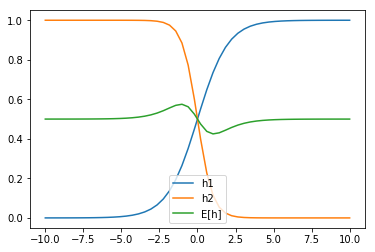

In [48]:

def theta(s):
    return 1 / (1 + np.exp(-s))

def h1(x0, x1):
    w0 = 0
    w1 = 1
    return theta(w0 * x0 + w1 * x1)

def h2(x0, x1):
    w0 = 0
    w1 = -2
    return theta(w0 * x0 + w1 * x1)

xx = np.linspace(-10, 10)
plt.plot(xx, h1(1, xx))
plt.plot(xx, h2(1, xx))
plt.plot(xx, 1/2 * (h1(1, xx) + h2(1, xx)))
plt.legend(["h1", "h2", "E[h]"])
plt.show()

$h_3(x)$ is clearly not a logistic function.

# Overfitting

# 3

Overfitting means fitting the data more than warranted. I.e. choosing a too complex model for the amount of data. Fitting to the noise.

a: If there is overfitting, there must be two or more hypotheses that have different values of E_in. -- True. We have chosen a too complex model that fits the input data too well, and in order to do that we had to compare multiple models.

b: If there is overfitting, there must be two or more hypotheses that have different values of E_out. -- True. If all hypotheses were equally good, we cannot really call this overfitting.

c: If there is overfitting, there must be two or more hypotheses that have different values of (E_out - E_in). -- ???

d: We can always determine if there is overfitting by comparing the values of E_out - E_in. -- ???

e: We cannot determine overfitting based on one hypothesis only. -- True.

# 4

Deterministic noise is the error due to complexity in the target function that our model cannot approximate.

Thus deterministic noise depends on our hypothesis set.

**Answer: Alternative 4D: Stochastic noise does not depend on the hypothesis set.**

# 5

The least squares linear regression solution satisfies the constraint. Thus the regularization has no effect, and w_reg = w_lin.

**Answer: Alternative A**

# 6

**Answer: Alternative B -- soft-order constraints can be translated into augmented error**